<a href="https://colab.research.google.com/github/juliafarah/MVP_Machine_Learning/blob/main/MVP_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MVP Machine Leaning & Analytics**



*Projeto realizado por* **Julia Farah** *(Matr.: 4052025001969)*

*Setembro 2025*

## **Introdução**

* ### **Definição e Descrição do Problema:**

Este trabalho visa explorar um **dataset de uma academia** a fim de desenvolver uma análise preditiva para identificar o melhor ***modelo de classificação supervisionado*** para prever a probabilidade de um aluno realizar o cancelamento (*churn*) da matrícula.

Utilizando técnicas de machine learning supervisionado, combinadas com as boas práticas da análise de dados, busca-se construir um classificador binário capaz de prever cancelamentos reais, minimizando falsos positivos e falsos negativos.

* ### **Premissas e hipóteses:**

O dataset inclui *variáveis binárias* estratégicas como gênero, proximidade da academia, parcerias e registro de telefone e *numérica*s como idade, tipo de contrato e tempo restante de matrícula. Juntas, essas *features* permitem identificar padrões comportamentais diretamente associados ao cancelamento de matrículas (*churn*).


Os insights gerados impactam diretamente a receita da academia, pois permitem antecipar cancelamentos com precisão, direcionar ações de retenção personalizadas, otimizar campanhas de *marketing* com foco nos alunos com maior propensão de cancelamento.


O propósito deste projeto visa transformar esses dados em um sistema proativo de gestão de *churn*, reduzindo perdas e aumentando a eficiência operacional.

* ### **Restrições e Condições dos Dados:**

As características categóricas dos alunos já estão estabelecidas como variáveis binárias (0/1) no dataset original facilitando o uso para este projeto.

* ###  **Lista dos atributos do dataset:**

> ***gender:*** gênero do usuário (0 = female / 1 = male)

> ***Near_Location:*** localização do aluno em relação a academia (1 = mora perto / 0 = mora longe)

> ***Partner:*** se inscreveu a partir de um parceiro? (0 = não se inscreveu / 1 = se inscreveu)

> ***Promo_friends (Bring_a_Friend_Promo):*** participou da promoção de "bring a friend"? (0 = não participou / 1 = participou)

> ***Phone:*** cadastrou o numero do telefone ao fazer a matricula? (0 = não cadastrou / 1 = cadastrou)

> ***Contract_period:*** tipo de contrato adquirido (1 - mensal / 6-semestral / 12 - anual)

> ***Group_visits:*** o aluno faz aula em grupo? (0 = não faz aula em grupo / 1 = faz aula em grupo)

> ***Age:*** idade

> ***Avg_additional_charges_total (Avg_Additional_Charge):***  quanto o aluno gastou em outros serviços disponibilizados pela academia (café, massagens, roupas e etc).

> ***Month_to_end_contract (Remaining_Contract_Period):*** quatidade de meses que faltam para o fim do contrato

> ***Lifetime:*** quantos meses fazem desde a primeira vez do aluno na academia

> ***Avg_class_frequency_total (Avg_Weekly_Visit):***  média das vezes que o aluno visita a academia *na semana*

> ***Avg_class_frequency_current_month (Avg_Weekly_Visit_this_month):*** média das vezes que o aluno visita a academia *no mês*

> ***Churn:*** o aluno cancelou a matricula? (0 = não / 1 = sim)


## **Carregamento do dataset**

Importando as bibliotecas:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, make_scorer, precision_recall_curve, auc, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from joblib import Parallel, delayed

Carregamento do dataset anexado no GitHub:

In [ ]:
file_path = 'https://raw.githubusercontent.com/juliafarah/MVP_Machine_Learning/refs/heads/main/gym_churn_dataset.csv'
df = pd.read_csv(file_path, sep=',')

df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## **Análise Exploratória dos Dados**

###Estatísticas Descritivas

In [ ]:
# verificando numero de linhas e colunas
df_columns = df.shape[1]
df_rows = df.shape[0]

print(f'O dataset possui:\n\n{df_rows} linhas e {df_columns} colunas.')

O dataset possui:

4000 linhas e 14 colunas.


In [ ]:
# renomeando algumas colunas para melhor compreensao
df = df.rename(columns={'gender' : 'Gender',
                        'Promo_friends' : 'Bring_a_Friend_Promo',
                        'Avg_additional_charges_total' : 'Avg_Additional_Charge',
                        'Month_to_end_contract' : 'Remaining_Contract_Period',
                        'Avg_class_frequency_total' : 'Avg_Weekly_Visit',
                        'Avg_class_frequency_current_month' : 'Avg_Weekly_Visit_this_month'
                  })

# ajustando o tipo da coluna de float para int
df['Remaining_Contract_Period'] = df['Remaining_Contract_Period'].astype('int')

df.head()

,Gender,Near_Location,Partner,Bring_a_Friend_Promo,Phone,Contract_period,Group_visits,Age,Avg_Additional_Charge,Remaining_Contract_Period,Lifetime,Avg_Weekly_Visit,Avg_Weekly_Visit_this_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


In [ ]:
# verificando se o tipo das colunas foi alterado corretamente
df.dtypes

,0
Gender,int64
Near_Location,int64
Partner,int64
Bring_a_Friend_Promo,int64
Phone,int64
Contract_period,int64
Group_visits,int64
Age,int64
Avg_Additional_Charge,float64
Remaining_Contract_Period,int64


In [ ]:
# estatisticas basicas do dataset
describe_columns = ['Contract_period', 'Age', 'Avg_Additional_Charge', 'Remaining_Contract_Period', 'Lifetime', 'Avg_Weekly_Visit', 'Avg_Weekly_Visit_this_month', 'Churn']

df[describe_columns].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Contract_period,4000.0,4.68,4.55,1.00,1.00,1.00,6.00,12.00
Age,4000.0,29.18,3.26,18.00,27.00,29.00,31.00,41.00
Avg_Additional_Charge,4000.0,146.94,96.36,0.15,68.87,136.22,210.95,552.59
Remaining_Contract_Period,4000.0,4.32,4.19,1.00,1.00,1.00,6.00,12.00
Lifetime,4000.0,3.72,3.75,0.00,1.00,3.00,5.00,31.00
Avg_Weekly_Visit,4000.0,1.88,0.97,0.00,1.18,1.83,2.54,6.02
Avg_Weekly_Visit_this_month,4000.0,1.77,1.05,0.00,0.96,1.72,2.51,6.15
Churn,4000.0,0.27,0.44,0.00,0.00,0.00,1.00,1.00


In [ ]:
# verificando se ha numeros faltantes ou nulos
df.isnull().sum()

,0
Gender,0
Near_Location,0
Partner,0
Bring_a_Friend_Promo,0
Phone,0
Contract_period,0
Group_visits,0
Age,0
Avg_Additional_Charge,0
Remaining_Contract_Period,0


### Análise do cancelamento (churn) entre as principais variáveis

In [ ]:
print("Principais conclusões sobre o Churn:\n")

churn_1 = df[df['Churn'] == 1]  # CANCELARAM
churn_0 = df[df['Churn'] == 0]  # MATRICULA ATIVA

config_colunas = {
    'Near_Location': {'sim': 'moram perto', 'nao': 'moram longe'},
    'Partner': {'sim': 'vieram por parceria', 'nao': 'não vieram por parceria'},
    'Bring_a_Friend_Promo': {'sim': 'participaram da promocao', 'nao': 'não participaram'},
    'Phone': {'sim': 'cadastraram o numero do telefone', 'nao': 'não cadastraram'},
    'Group_visits': {'sim': 'fazem aulas em grupo', 'nao': 'não fazem aulas em grupo'},
    'Gender': {'sim': 'homens', 'nao': 'mulheres', 'inverter': True} # uso do inverter é necessario pq gender nao é uma variavel boleana apenas esta config no dataset como 0 = female / 1 = male
}

# os percentuais para de cada coluna
def calcular_percentuais(grupo, coluna, inverter=False):

    if inverter:
        return (1 - grupo[coluna].mean()) * 100, grupo[coluna].mean() * 100
    else:
        return grupo[coluna].mean() * 100, 100 - grupo[coluna].mean() * 100

# formata cada linha do resultado
def formatar_linha(coluna, percentuais, config):
    """Formata uma linha do resultado"""
    nome_coluna = coluna.replace('_', ' ').title()
    return f"  - {nome_coluna}: {percentuais[1]:.0f}% {config['nao']} e {percentuais[0]:.0f}% {config['sim']}"

# CANCELARAM
print("• Entre os alunos que CANCELARAM:")
for coluna, config in config_colunas.items():
    percentuais = calcular_percentuais(churn_1, coluna, config.get('inverter', False))
    print(formatar_linha(coluna, percentuais, config))

# NAO CANCELARAM
print("\n• Entre os alunos com matrícula ATIVA:")
for coluna, config in config_colunas.items():
    percentuais = calcular_percentuais(churn_0, coluna, config.get('inverter', False))
    print(formatar_linha(coluna, percentuais, config))

Principais conclusões sobre o Churn:

• Entre os alunos que CANCELARAM:
  - Near Location: 23% moram longe e 77% moram perto
  - Partner: 64% não vieram por parceria e 36% vieram por parceria
  - Bring A Friend Promo: 82% não participaram e 18% participaram da promocao
  - Phone: 10% não cadastraram e 90% cadastraram o numero do telefone
  - Group Visits: 73% não fazem aulas em grupo e 27% fazem aulas em grupo
  - Gender: 51% mulheres e 49% homens

• Entre os alunos com matrícula ATIVA:
  - Near Location: 13% moram longe e 87% moram perto
  - Partner: 47% não vieram por parceria e 53% vieram por parceria
  - Bring A Friend Promo: 65% não participaram e 35% participaram da promocao
  - Phone: 10% não cadastraram e 90% cadastraram o numero do telefone
  - Group Visits: 54% não fazem aulas em grupo e 46% fazem aulas em grupo
  - Gender: 51% mulheres e 49% homens


Os resultados acima mostram que:

1. **Morar longe** tem uma influencia considerável no cancelamento de matriculas na academia.

2. **Aulas em grupo** retêm mais alunos ao comparados com atividades individuais.

3. **Parcerias** trazem alunos fiéis.

4. A **promoção "Traga um Amigo"** mostra-se efetiva na retenção de alunos, reduzindo em 64% a taxa de cancelamento entre participantes e nao participantes da promoção. Logo, quem participa da promoção tem maior chance de permanecer ativo na academia ao comparado com alunos que nao participaram.

5. **Cadastro do número do telefone** não está sendo utilizado de forma eficaz visto que tem grande potencial de ajudar na retenção do aluno através de lembretes e outras notificações. Indicando que a academia não está usando bem deste canal.

6. **Gênero** do aluno não influencia no cancelamento de matriculas.

###Correlação entre os atributos (variáveis)

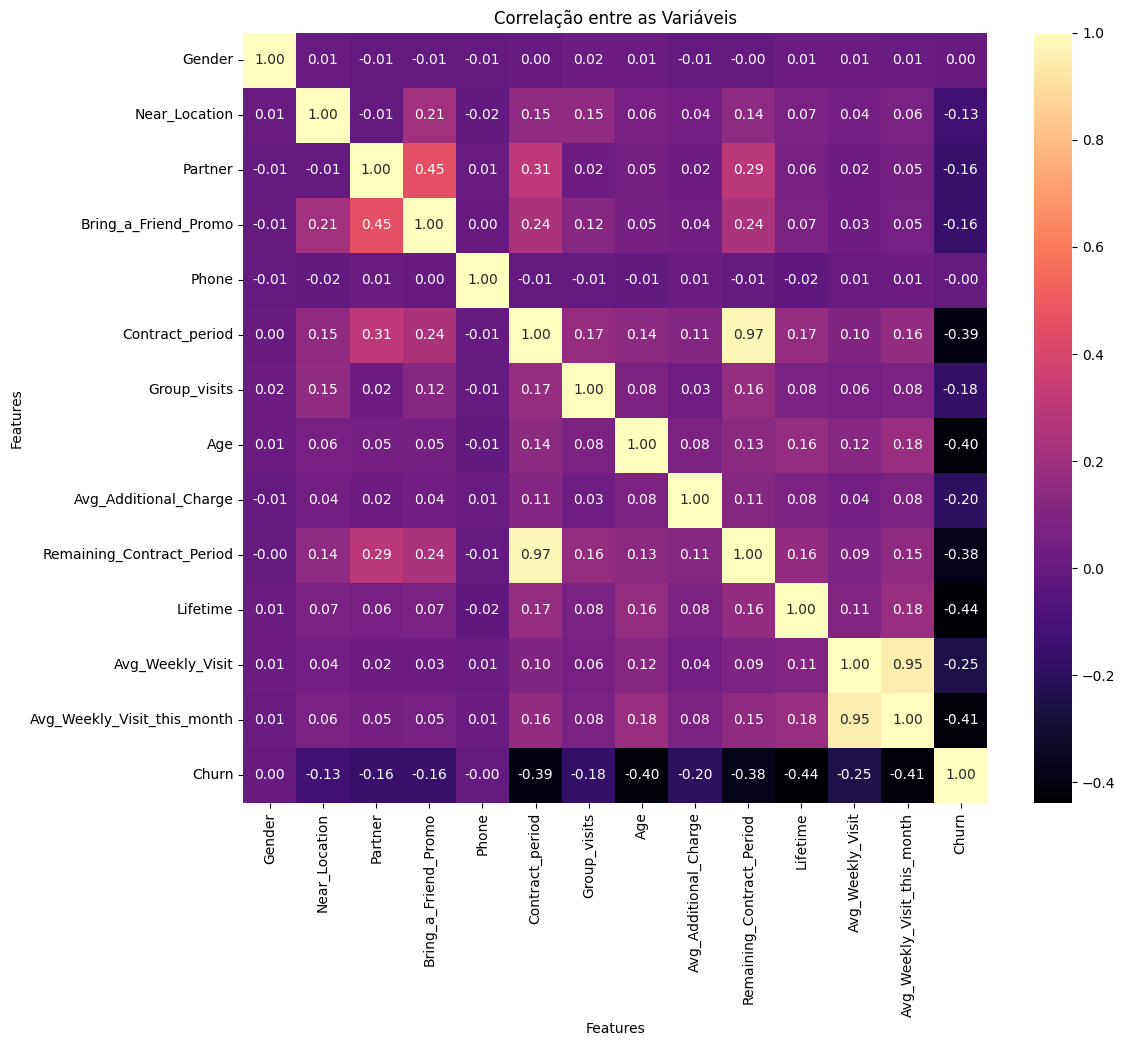

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data=df.corr(),
            annot = True,
            cmap = 'magma',
            fmt='.2f')

plt.gca().set_title('Correlação entre as Variáveis')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

***Destaques interessantes :***

Com base nos resultados da variavel-target **`Churn`** e das variaveis **`Gender`** e **`Phone`** não possuem nenhum tipo de correlação. Enquanto isso, as demais variáveis possuem correlações negativas. Isso indica que todas essas variáveis não influenciam diretamente na decisão do aluno de cancelar ou não a matrícula.


### Histogramas de variáveis não-categóricas

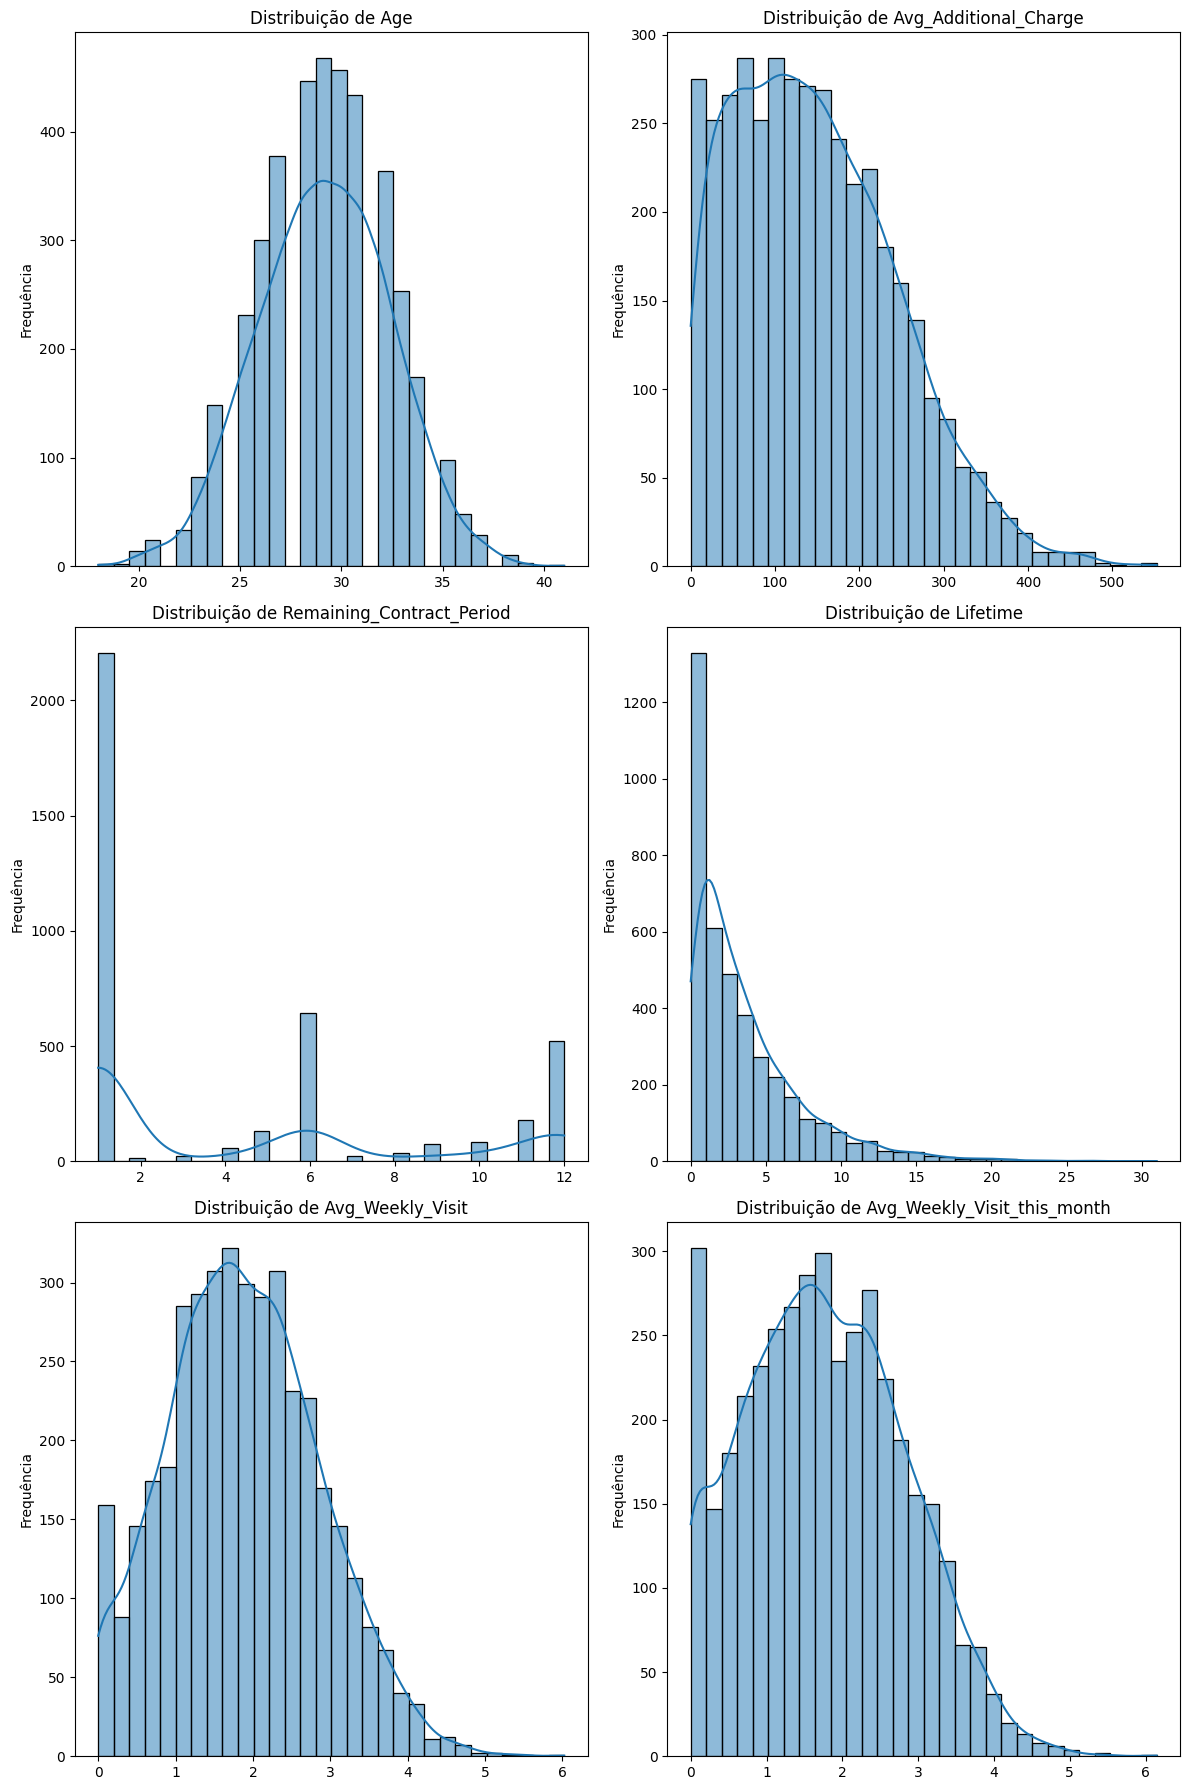

In [ ]:
# filtrando apenas colunas numéricas
columns = ['Age', 'Avg_Additional_Charge', 'Remaining_Contract_Period',	'Lifetime',	'Avg_Weekly_Visit',	'Avg_Weekly_Visit_this_month']

# monstando a figura
n_cols = 2
n_rows = -(-len(columns) // n_cols)  # ve as linhas necessárias

plt.figure(figsize=(12, 6*n_rows))

for i, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, i+1)

    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
    plt.xlabel('')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

**Destaques interessantes :**

**Distribuição da Idade (`Age`):**
* Concentrada entre 30-50 anos
* Pico por volta dos 40 anos
* Distribuição aproximadamente normal

**Gastos com outros serviços (`Avg_Additional_Charge`):**
* Grande pico próximo de zero
* Poucos clientes com cobranças extras significativas
* Distribuição altamente assimétrica

**Tempo Restante de Contrato (`Remaining_Contract_Period`):**
* Alta concentração em contratos curtos (0-6 meses)
* Poucos clientes com contratos longos
* Possível indicador de rotatividade

**Tempo Matriculado (`Lifetime`) :**
* Concentração em alunos com matrículas recentes (0-24 meses)
* Cauda longa de clientes fiéis
* Base com boa mistura de novos e antigos

**Visitas por semana (`Avg_Weekly_Visit`):**
* Distribuição assimétrica à direita
* Maioria com 0-2 visitas por semana
* Poucos clientes muito frequentes.

**Visitas por semana no mês atual (`Avg_Weekly_Visit_this_month`):**
* Distribuição extremamente concentrada em 0-1 visitas
* Pico muito acentuado próximo de zero
* Assimetria extrema à direita
* Possível indicador de baixo engajamento recente

**Gastos com outros serviços (`Avg_Additional_Charge`):**
* Grande pico próximo de zero
* Poucos clientes com cobranças extras significativas
* Distribuição altamente assimétrica




> **Destaques interessantes ao comparar as variáveis `Avg_Weekly_Visit` e `Avg_Weekly_Visit_this_month`:**

1. Visitas deste mês estão significativamente menores que a média histórica
2. Possível queda recente no engajamento dos clientes
3. Variável potencialmente importante para prever churn

Logo, a diferença entre o comportamento recente e histórico pode ser uma feature importante na previsão de churn.

## **Pré-processamento dos dados**

Separação dos dados em treino e teste :


*   **Removendo colunas multicolineares** - as duas variaveis contem informações semlhantes a colunas ja existentes no dataset (`remaining_period` × `Contract_period` || `avg_visit_weekly` × `avg_visit_this_month`). A não remoçao pode causar overlifting e tornar a interpretação dos modelos mais dificies.



In [ ]:
X = df.drop(columns=['Churn','Remaining_Contract_Period','Avg_Weekly_Visit'], axis=1) # features
y = df['Churn'] # target


# dividindo o dataset em 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Preparando apenas os dados de treino para evitar vazamento de dados (*data leakage*) para deixar os dados de teste o mais próximo da realidade possivel.

In [ ]:
# separar os atributos numericos
numeric_features = X_train.select_dtypes(include=['float64','int64']).columns
numeric_features = [col for col in numeric_features if not set(X_train[col].unique()).issubset({0, 1})] # remove a coluna de Gender

# filtrar apenas as que são realmente binárias (0/1)
binary_features = X_train.select_dtypes(include=['int64']).columns
binary_features = [col for col in binary_features if set(X_train[col].unique()).issubset({0, 1})]

print(f"Numéricas contínuas: {list(numeric_features)}\n")
print(f"Binárias (0/1): {list(binary_features)}\n")

# pre processamento para atributos numericos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# pre processamento para atributos binarios
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# juntando ambos pre processamentos anteriores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bin', binary_transformer, binary_features)
    ])

Numéricas contínuas: ['Contract_period', 'Age', 'Avg_Additional_Charge', 'Lifetime', 'Avg_Weekly_Visit_this_month']

Binárias (0/1): ['Gender', 'Near_Location', 'Partner', 'Bring_a_Friend_Promo', 'Phone', 'Group_visits']



A criação do pipeline assegura que o processamento dos dados sejam aplicados nos dados de treino e teste minimizando, assim, o risco de vazamento de dados (*data leakage*)

## **Escolhendo o Modelo**

In [ ]:
# testando todos os modelos de classificação que fazem sentido para o dataset
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC()
}


Listando métricas usadas nesta avaliação

In [ ]:
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, average='weighted'),
    'Recall': make_scorer(recall_score, average='weighted'),
    'F1 Score': make_scorer(f1_score, average='weighted'),
    'ROC AUC': make_scorer(roc_auc_score, average='weighted', multi_class='ovr')
}

> **Métricas usadas:**

*   ***Accurancy*** *(Acurácia)* : Mede a proporção geral das previsões corretas, tanto positivas quanto negativas, em relação ao total de instâncias. Neste caso, é o percentual total de previsões corretas sobre o comportamento do usuário.

* ***Precision*** *(Precisão)* : Mede entre todas as previsões positivas feitas pelo modelo quantas eram de fato positivas. Isto é, neste MVP, mede a confiança de que um cancelamento da matricula está correto.

* ***Recall*** : Dentre todos os usuários que realmente engajaram, quantos o modelo conseguiu prever corretamente. Alto recall significa que o modelo perde poucas oportunidades reais, capturando a maioria dos usuários de interesse.

* ***F1 Score*** : É o equilíbrio entre Precisão e Recall. Utilizada para medir a eficácia geral em um cenário onde tanto falsos positivos (ação desnecessária) quanto falsos negativos (oportunidade perdida - cancelamento) têm custos.

* ***ROC AUC*** : Capacidade do modelo de classificar os usuários corretamente. Isto é, para esta análise, classificar entre usuário com matricula cancelada e os usuários com matricula ativa.

Comparando as métricas-chave de score para cada modelo

In [ ]:
results = []

for name, model in models.items():
  pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

  scores = cross_validate(
      pipeline,
      X_train,
      y_train,
      cv=10, # cross validation com 10 folds
      scoring=scoring_metrics,
      n_jobs=-1
      )

  result = {
      'Model' : name,
      'Accurancy': scores['test_Accuracy'].mean(),
      'Precision': scores['test_Precision'].mean(),
      'Recall': scores['test_Recall'].mean(),
      'F1 Score': scores['test_F1 Score'].mean(),
      'ROC AUC': scores['test_ROC AUC'].mean()
  }

  results.append(result)

# formatando em um dataframe para melhor visualizacao e analise dos resultados
df_results = pd.DataFrame(results)
df_results.sort_values(by='Accurancy', ascending=False, inplace=True)
df_results.reset_index(drop=True, inplace=True)
df_results

,Model,Accurancy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.912813,0.913095,0.912813,0.912599,0.886978
1,SVM,0.910937,0.910946,0.910937,0.910438,0.881629
2,Gradient Boosting,0.905937,0.905219,0.905937,0.905076,0.872666
3,Random Forest,0.904375,0.903317,0.904375,0.903126,0.866809
4,XGBoost,0.895937,0.895663,0.895937,0.895496,0.863632
5,KNN,0.889062,0.890272,0.889062,0.889349,0.861528
6,Naive Bayes,0.884375,0.895096,0.884375,0.887219,0.881571
7,Decision Tree,0.862812,0.863339,0.862812,0.862661,0.825519


> Verificação da necessidade **balanceamento do dataset** a partir das métricas-chave

In [ ]:
churn_rate = y.mean()
print(f"Taxa de Churn: {churn_rate:.2%}")

if 0.4 <= churn_rate <= 0.6:  # 40-60% = balanceado
    print("Dataset balanceado!")
elif 0.2 <= churn_rate <= 0.8:  # 20-80% = levemente desbalanceado
    print("Dataset levemente desbalanceado!")
else:  # <20% ou >80% = muito desbalanceado
    print("Dataset muito desbalanceado!")

Taxa de Churn: 26.52%
Dataset levemente desbalanceado!


A ***taxa de 26,5% de cancelamentos*** é considerada um leve desbalanceamento comum em problemas de churn. Para garantir que o modelo não tendencie para a classe majoritária, na etapa seguinte de *Validação e Otimização de Hiperparâmetros* utilizarei **`class_weight='balanced'`**, para ajustar automaticamente os pesos durante o treinamento, garantindo a igualidade de ambas as classes.

> **Análise de erros** - ***Matriz confusão** dos 3 melhores modelos com base no F1 Score*

* *Escolhi usar o ***ROC AUC*** para rankear os modelos pois, é a métrica mais indicada entre as fornecidas nas aulas, sendo um bom equilíbrio entre evitar o desperdício de recursos (minimizar FPs, alta Precisão) e evitar perdas de matrículas (minimizar FNs, alta Recall).*

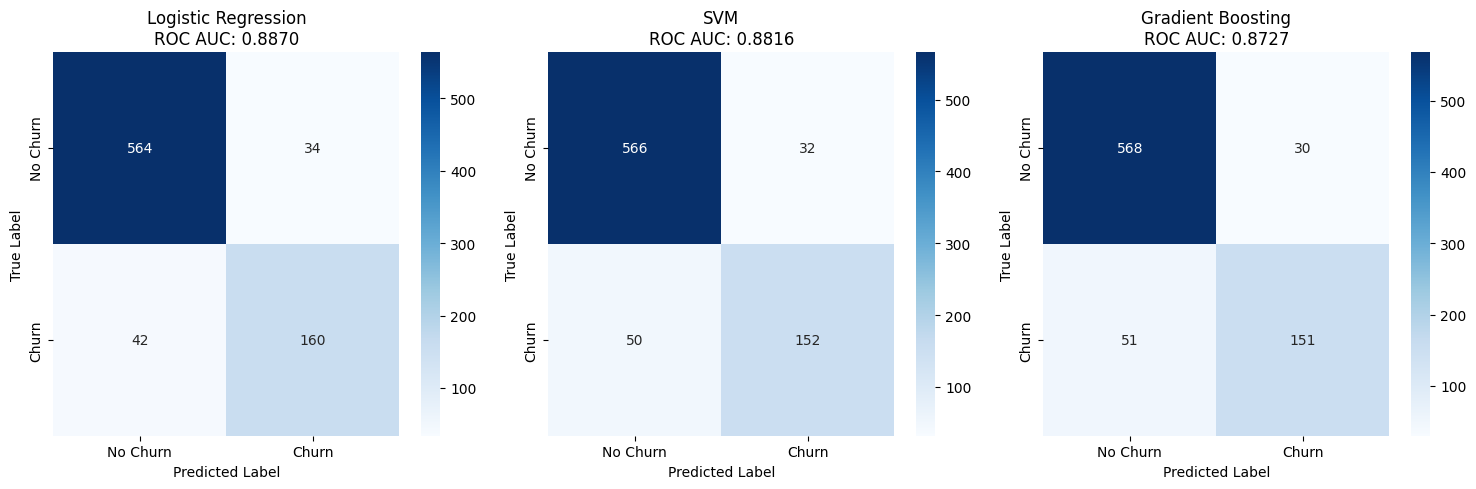

In [ ]:
# 3 melhores modelos com base no F1-Score (mais relacionada ao custo do negócio)
top_3_models = df_results.nlargest(3, 'F1 Score')['Model'].values

# um dicionário com os 3 melhores modelos
best_models = {name: models[name] for name in top_3_models}

# figura para os plots (1 linha, 3 colunas)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (name, model) in enumerate(best_models.items()):

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train) # treina no conjunto de treino completo
    y_pred = pipeline.predict(X_test) # preve no conjunto de teste

    # plota a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
    axes[i].set_title(f'{name}\nROC AUC: {df_results[df_results["Model"] == name]["ROC AUC"].values[0]:.4f}')

plt.tight_layout()
plt.show()

**Matriz Confusão** - *interpretação de cada quadrante*

*Quadrantes azuis claro*

* **Falsos Negativos** (Quadrante **Inferior Esquerdo**) : O pior erro pois mostra que o aluno vai cancelar e o modelo não previu. Portanto, a academia perde chances de agir para evitar a perda de alunos.

* **Falsos Positivos** (Quadrante **Superior Direito**) : Mostra que o modelo previu o cancelamento da matricula porém, o aluno não iria de fato cancelar. Por este motivo, é considerado um erro caro pois gasta-se recursos desnecessariamente.

*Quadrantes azuis escuro :*

* **Verdadeiros Positivos** (Quadrante **Inferior Direito**) : Indica os alunos que de fato cancelaram e o modelo previu corretamente que eles cancelariam, possibilitando ações do marketing para evitar essa perda.

* **Verdadeiros Negativos** (Quadrante **Superior Esquerdo**) : Indica usuários que *não* cancelaram e o modelo previu corretamente que, de fato, nao cancelariam, evitando assim custos e ações desnecessárias da equipe de marketing.

> #### **Ranking de cada modelo :**


🟢 **Melhor performance :** ***Logistic Regression***

Lidera todas as métricas com performance superior (**91.28% Acurácia, ROC AUC 88.70%**).

 * ***Precisão Altíssima (91.30%)*** : O modelo ao identificar um aluno como propenso a cancelar, há 91% de confiança para a equipe de retenção tomar ações direcionadas, ou seja, indica baixo índice de "falso alarme".

* ***Recall Excelente (91.28%)*** : O modelo identifica a grande maioria dos alunos que vão realmente cancelar, minimizando a perda de receita por churn não detectado.

* ***Rankeamento Consistente (AUC 88.70%)*** : Mostra que o modelo é ótimo em ordenar os alunos por probabilidade de cancelamento, permitindo que a academia priorize esforços de retenção de forma focada e eficiente.

* ***Matriz de Confusão*** : Mostra que a grande maioria dos casos está na diagonal (acertos), com erros minimizados, confirmando a robustez do modelo.


 🟡 **Performance Muito Boa :** ***SVM*** e ***Random Forest***.

Com performance acima de 90% são excelentes alternativas.

* **SVM (91,09%)** : Mostra grande competitividade, ficando muito próximo da Logistic Regression em todas as métricas, com ROC AUC de 0.8816.

* **Random Forest (90.63%)** : Embora ligeiramente inferior, ainda mantém performance sólida acima de 90% na maioria das métricas, demonstrando boa capacidade preditiva.

Estes modelos seriam escolhas viáveis caso houvesse necessidade de alternativas, mas a Logistic Regression mantém vantagem consistente.



 🟠 **Performance Sólida :** ***Gradient Boosting***, ***XGBoost*** e ***KNN***

 Performance na faixa de 88-90% com ROC AUC entre 86-87%.

* **Gradient Boosting (90.59%)**: Mostra força em acurácia mas fica um pouco behind em poder discriminatório (AUC 0.8650).

* **XGBoost (89.59%)** : Ficou abaixo de modelos mais simples, possivelmente devido à natureza dos dados ou necessidade de tuning mais agressivo.

* **KNN (88.90%)** : Desempenho bom mas significativamente inferior aos demais, tornando-o menos atraente dado o desempenho superior de alternativas mais simples.


 🔴 **Performance Baixa :** ***Naive Bayes*** e ***Decision Tree***

Resultados abaixo do desejado para implementação.

* **Naive Bayes (88.44%)** : As suposições de independência que não se sustentam bem neste contexto de dados de academia, resultando em performance não significativa.

* **Decision Tree (86.40%)** : Mostrou-se como a pior performance geral, com ROC AUC de apenas 0.8282, indicando forte tendência a overfitting ou incapacidade de capturar relações complexas nos dados.



### **Seleção do Modelo**

O **Logistic Regression** demonstrou uma performance superior em todas as métricas. Indicando que o modelo é bastante preciso, capaz de capturar a grande maioria dos casos positivos (*Recall* acima de 91%). Paralelamente, a alta *Precisão* demonstra que o modelo raramente classifica incorretamente um caso negativo como positivo, e F1-Score de 91% confirma esse equilíbrio. Por fim, o *ROC AUC* de 88% reforça ainda mais que o modelo possui uma satisfatória capacidade de distinção inerente entre as classes.

Desta forma, e com base nas análise realizadas e pelo bom equilíbrio entre Precisão e Recall, o algoritmo **Logistic Regression** é a melhor opção e será usado nas próximas etapas deste MVP.

## **Validação e Otimização de Hiperparâmetros do melhor Modelo (LR)**

*Buscando a melhor combinação possível para maximizar o desemprenho do modelo*

Iniciando busca de hiperparâmetros...
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Busca concluída!

Melhores parâmetros encontrados:
{'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}

Melhor ROC AUC (validação): 0.9671

Metricas no teste
ROC AUC: 0.9635
Acurácia: 0.9012
Precision: 0.8187
Recall: 0.7822
F1-Score: 0.8000




<Figure size 200x400 with 0 Axes>

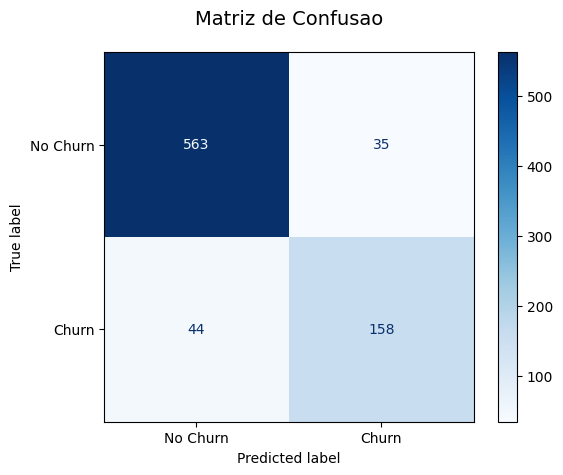

Verdadeiros Negativos: 563
Falsos Positivos: 35
Falsos Negativos: 44
Verdadeiros Positivos: 158
Total de alunos analisados: 800 


Resumo da Classificacao

              precision    recall  f1-score   support

    No Churn       0.93      0.94      0.93       598
       Churn       0.82      0.78      0.80       202

    accuracy                           0.90       800
   macro avg       0.87      0.86      0.87       800
weighted avg       0.90      0.90      0.90       800



Precision-Recall AUC: 0.9040


In [ ]:
# pipeline ja com o pre-processador
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

param_grid = {
    'classifier__C': [0.01, 0.1, 1.0, 10.0],   # parametro de regularizacao
    'classifier__penalty': ['l1', 'l2'],       # tipo de regularizacao
    'classifier__solver': ['liblinear'],       # solver que funciona com L1 e L2
    'classifier__class_weight': [None, 'balanced']  # balanceamento de classes por conta do balanceamento aceitavel
}


# validacao cruzada
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=10, # menor variancia nos resultados
    n_jobs=-1,
    verbose=1
)

# roda o grid search
print("Iniciando busca de hiperparâmetros...")
grid_search.fit(X_train, y_train)
print("Busca concluída!")

# mostra os melhores resultados
print("\nMelhores parâmetros encontrados:")
print(grid_search.best_params_)

print(f"\nMelhor ROC AUC (validação): {grid_search.best_score_:.4f}")

# avalia o modelo otimizado no conjunto de teste
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# metricas de performance
roc_auc_test = roc_auc_score(y_test, y_pred_proba)
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

print("\nMetricas no teste")
print(f"ROC AUC: {roc_auc_test:.4f}")
print(f"Acurácia: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}\n\n")

# matriz de confusao
plt.figure(figsize=(2, 4))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusao', fontsize=14, pad=20)
plt.grid(False)
plt.show()

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# soma do total de alunos da matriz confusao
tot_alunos = (tn + fp + fn + tp)

print(f"Verdadeiros Negativos: {tn}")
print(f"Falsos Positivos: {fp}")
print(f"Falsos Negativos: {fn}")
print(f"Verdadeiros Positivos: {tp}")
print(f"Total de alunos analisados: {tot_alunos} ")

# resumo das metricas
print("\n\nResumo da Classificacao\n")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))


# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"\n\nPrecision-Recall AUC: {pr_auc:.4f}")

*Verificação de overlifting :*

In [ ]:
# avaliar performance no treino e no teste
y_train_proba = best_model.predict_proba(X_train)[:, 1]
y_test_proba = best_model.predict_proba(X_test)[:, 1]

train_score = roc_auc_score(y_train, y_train_proba)
test_score = roc_auc_score(y_test, y_test_proba)

print(f"ROC AUC Treino: {train_score:.4f}")
print(f"ROC AUC Teste:  {test_score:.4f}")
print(f"Diferença:      {abs(train_score - test_score):.4f}")

# definindo limites de overlifting
if abs(train_score - test_score) > 0.05:
    print("\nPossível overfitting!")
elif abs(train_score - test_score) > 0.02:
    print("\nPequena diferença, mas dentro do aceitável")
else:
    print("\nModelo generaliza de forma satisfatoria!")


ROC AUC Treino: 0.9682
ROC AUC Teste:  0.9635
Diferença:      0.0047

Modelo generaliza de forma satisfatoria!


***Overlifting satisfatório***

Desempenho entre treino e teste é bem próximo indicando que o modelo aprendeu padrões genuínos que se aplicam a dados novos e não decorou os dados de treino.

> Comparação ***baseline*** vs. ***Logistic Regression*** *(melhor modelo)*

In [ ]:
# majority class baseline (não precisa de pré-processamento)
dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, y_train)  # dados brutos
y_pred_dummy = dummy_majority.predict(X_test)

# metricas do baseline
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
precision_dummy = precision_score(y_test, y_pred_dummy, zero_division=0)
recall_dummy = recall_score(y_test, y_pred_dummy, zero_division=0)
f1_dummy = f1_score(y_test, y_pred_dummy, zero_division=0)
roc_auc_dummy = roc_auc_score(y_test, y_pred_dummy)

# criar dataframe so com os resultados
resultados = {
    'Modelo': ['Majority Class', 'LR Otimizado'],
    'Accurancy': [accuracy_dummy, accuracy_test],
    'Precision': [precision_dummy, precision_test],
    'Recall': [recall_dummy, recall_test],
    'F1-Score': [f1_dummy, f1_test],
    'ROC AUC': [roc_auc_dummy, roc_auc_test]
}

df_comparacao = pd.DataFrame(resultados)
print("Baseline vs. Logistic Regression (melhor modelo)\n")

print(df_comparacao.round(4))

# calculo da melhoria
melhoria_acuracia = (accuracy_test - accuracy_dummy) * 100
melhoria_roc_auc = (roc_auc_test - roc_auc_dummy) * 100

print(f"\nQuanto o Logistic Regression performou melhor que a baseline:")
print(f"Accurancy: +{melhoria_acuracia:.1f}%")
print(f"ROC AUC: +{melhoria_roc_auc:.1f}%")

Baseline vs. Logistic Regression (melhor modelo)

           Modelo  Accurancy  Precision  Recall  F1-Score  ROC AUC
0  Majority Class     0.7475     0.0000  0.0000       0.0   0.5000
1    LR Otimizado     0.9012     0.8187  0.7822       0.8   0.9635

Quanto o Logistic Regression performou melhor que a baseline:
Accurancy: +15.4%
ROC AUC: +46.3%


## **Avaliação do modelo Logistic Regression**

O modelo **Logistic Regression** mostrou-se como a ***melhor escolha para este MVP***, com performance excepcional de ROC AUC 0.9663 na validação e 0.9635 no teste.

A partir da availaçao geral do modelo, pode-se dizer que:

1.   ***Redução significativa de Churn (cancelamentos)***

Apenas 44 de 800 alunos que cancelariam e não foram identificados (falsos negativos), ou seja, 5,5%. O modelo apresenta confiabilidade para prever com boa precisão os alunos que realmente pretendem cancelar.

2.   ***Marketing com alta precisão***

Com apenas 35 falsos positivos em 800 alunos (4.25%), o time de marketing não desperdiçará recursos (emails, promoções e etc) com alunos satisfeitos e sem pretensão de cancelar. Isso reduz custos operacionais e evita o desgaste na experiência (UX) de alunos fiéis.

3. ***Eficiência Operacional Excepcional***

O time de retenção, *responsável por manter o usuário ativo,* pode priorizar ações com grande confiança, pois cada alerta do modelo tem precisão de 82% de representar um risco real de churn, permitindo concentrar medidas onde realmente importa.

> Análise dos Parametros Otimizados


1. **`C: 0.1`** - *Regularização moderada.*

Indica que o modelo beneficia-se de uma regularização suave, prevenindo *overfitting* enquanto mantém boa capacidade preditiva. O balanceamento ótimo entre viés e variância.

2. **`penalty: 'l1'`** - *Seleção automática dos melhores features.*

O uso da regularização L1 (Lasso) mostra que o modelo automaticamente seleciona as features mais importantes, zerando coeficientes de variáveis menos relevantes. Isso resulta em um modelo mais enxuto e interpretável.

3. **`class_weight: None`** - *Mostra que os dados estão naturalmente balanceados.*

O fato de não precisar de balanceamento de classes indica que sua taxa de *churn* de 26.52% é saudável para modelagem preditiva, não requerendo ajustes artificiais.  

4. **`solver: 'liblinear'`** - *Mostra eficiência computacional.*

A escolha deste solver otimizado para problemas com regularização L1 garante treinamento rápido e eficiente, ideal para ambiente de produção.


## **Conclusão final**

 O modelo **Logistic Regression otimizado** demonstra performance excelente com 96,35% de poder discriminatório (ROC AUC) e 90,12% de acurácia, significativamente, superior a baseline em 45,7%. Sua arquitetura com regularização L1 garante um modelo enxuto e interpretável, ideal para ações direcionadas de retenção. Com baixíssimo *overfitting* e alta precisão (81,87%), ***o modelo transforma a gestão de *churn* em um processo preditivo eficiente, permitindo à academia atuar preventivamente com custos otimizados e impacto direto na receita.***